<a href="https://colab.research.google.com/github/Kneir-E/Machine-Learning-CIFAR100/blob/main/Pokedex_AI_but_for_water_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import classification_report
import time

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#LOAD THE DATA
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.cifar100.load_data(label_mode = 'fine')

169001437/169001437 [==============================] - 3s 0us/step


In [ ]:
#FILTER THE DATA TO ONLY AQUATIC MAMMALS
fineLabelConv = [4, 30, 55, 72, 95]
fineLabelVal = ["beaver", "dolphin", "otter", "seal", "whale"]

#Create Train Data List and Test Data List      --    RAW DATA
trainList = []
trainLabels = []
testList = []
testLabels = []

#Extract the data
for idx, label in enumerate(ytrain):
    if label in fineLabelConv:
      trainList.append(xtrain[idx])
      trainLabels.append(fineLabelConv.index(ytrain[idx][0]))

for idx, label in enumerate(ytest):
    if label in fineLabelConv:
      testList.append(xtest[idx])
      testLabels.append(fineLabelConv.index(ytest[idx][0]) )

#Convert to numpy
trainList   = np.array(trainList)
trainLabels = np.array(trainLabels)
testList    = np.array(testList)
testLabels  = np.array(testLabels)

In [ ]:
print(trainLabels)

[2 3 4 ... 2 0 3]


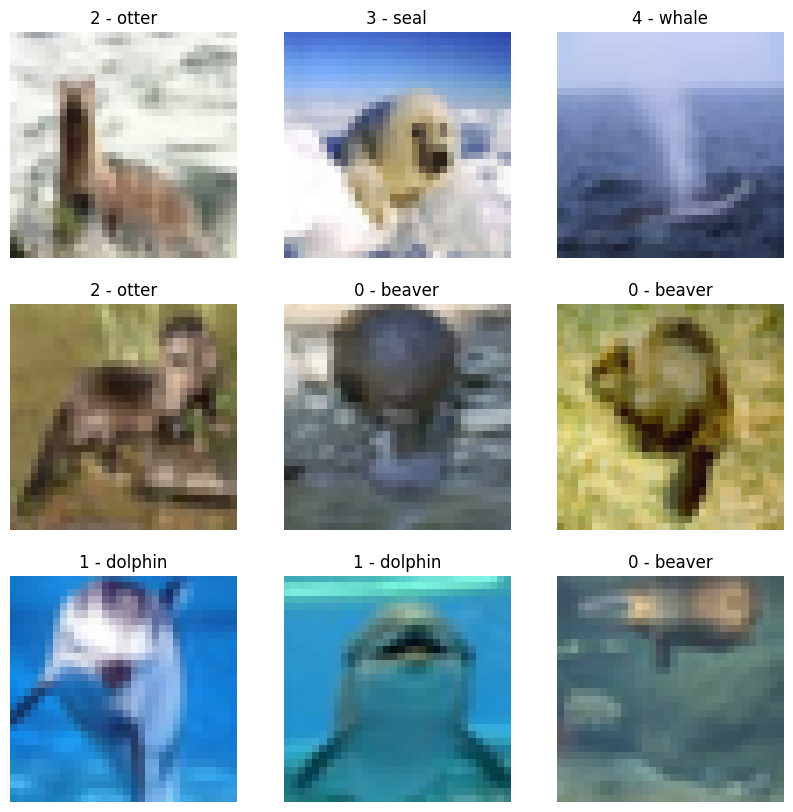

In [ ]:
#Playing around with this code - SAFE TO DELETE
tempList = trainList
tempLabels = trainLabels

plt.figure(figsize=(10, 10))
for i, data in enumerate(tempList):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(tempList[i])
  plt.title( str(str(tempLabels[i])+' - '+fineLabelVal[tempLabels[i]]) )
  plt.axis("off")
  if i == 8: break

NOTE:
```fine label``` values are :

    4 - "beaver"
    30 - "dolphin"
    55 - "otter"
    72 - "seal"
    95 - "whale"

  Source: [Definitely not a Rick Roll](https://github.com/MartinThoma/algorithms/blob/master/ML/confusion-matrix/labels/cifar-100-labels.json)

In [ ]:
# PREPROCESSING AND CREATING THE DATASETS

# Create a dataset from the filtered train and test data
train_dataset = tf.data.Dataset.from_tensor_slices((trainList, trainLabels))
test_dataset = tf.data.Dataset.from_tensor_slices((testList, testLabels))

# Batch the dataset
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

LINKS

Source of fine data labels: [Definitely not a Rick Roll](https://github.com/MartinThoma/algorithms/blob/master/ML/confusion-matrix/labels/cifar-100-labels.json)

Read about Computer Vision: [May or may not be a Rick Roll](https://www.tensorflow.org/tutorials/images)

Read about Image Classification: [20% Chance to be a Rick ROll](https://www.tensorflow.org/tutorials/images/classification)

Image Classification Colab Sample Code: [Not a Rick Roll](https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/image_classification_from_scratch.ipynb#scrollTo=sN2LEHAm4hXo)

Computer Vision Methods: [LINK](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

Another Link: [Is a Rick Roll](https://paperswithcode.com/methods/area/computer-vision)


Probs Final Model

In [ ]:
# CREATING THE MODEL
num_classes = 5

f_model = Sequential([
  layers.RandomFlip("horizontal", input_shape=(32,32,3)),
  layers.RandomRotation(0.1),
  layers.Rescaling(1./255),

  layers.Conv2D(32, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  # Flatten layer to transition from convolutional layers to fully connected layers
  layers.Flatten(),

  # Dense layers
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

f_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
f_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_1 (RandomR  (None, 32, 32, 3)         0         
 otation)                                                        
                                                                 
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)       

In [ ]:
# Training and Testing the model
f_epochs=60
f_history = f_model.fit(
    trainList,
    trainLabels,
    epochs=   f_epochs,
    validation_split=0.1,
    callbacks=[callback]
)

Epoch 1/60
71/71 [==============================] - 6s 65ms/step - loss: 3.2382 - accuracy: 0.3493 - val_loss: 3.1559 - val_accuracy: 0.1600
Epoch 2/60
71/71 [==============================] - 5s 76ms/step - loss: 2.4426 - accuracy: 0.4231 - val_loss: 3.6125 - val_accuracy: 0.1600
Epoch 3/60
71/71 [==============================] - 4s 61ms/step - loss: 2.0903 - accuracy: 0.4467 - val_loss: 3.5700 - val_accuracy: 0.1600
Epoch 4/60
71/71 [==============================] - 4s 61ms/step - loss: 1.8835 - accuracy: 0.4418 - val_loss: 2.8184 - val_accuracy: 0.1840
Epoch 5/60
71/71 [==============================] - 5s 76ms/step - loss: 1.7106 - accuracy: 0.4769 - val_loss: 2.0556 - val_accuracy: 0.2960
Epoch 6/60
71/71 [==============================] - 4s 61ms/step - loss: 1.5888 - accuracy: 0.4876 - val_loss: 1.7843 - val_accuracy: 0.4120
Epoch 7/60
71/71 [==============================] - 5s 68ms/step - loss: 1.4805 - accuracy: 0.5040 - val_loss: 1.6202 - val_accuracy: 0.4920
Epoch 8/60
71

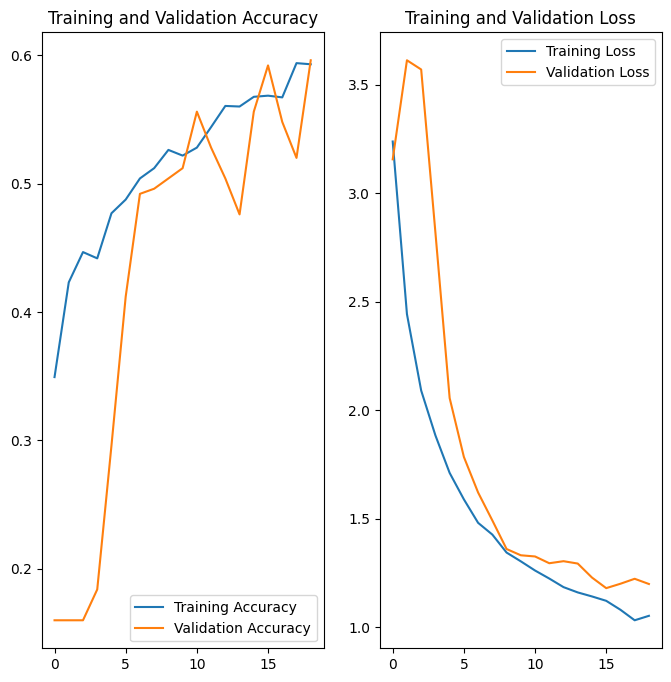

In [ ]:
# Presenting results of training
f_acc = f_history.history['accuracy']
f_val_acc = f_history.history['val_accuracy']

f_loss = f_history.history['loss']
f_val_loss = f_history.history['val_loss']

f_epochs_range = range(19)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(f_epochs_range, f_acc, label='Training Accuracy')
plt.plot(f_epochs_range, f_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(f_epochs_range, f_loss, label='Training Loss')
plt.plot(f_epochs_range, f_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Test on testdata
scores = f_model.evaluate(testList, testLabels)
print(f'accuracy on test set: {f_model.metrics_names[1]} of {scores[1]*100}')

16/16 [==============================] - 0s 14ms/step - loss: 1.1802 - accuracy: 0.5500
accuracy on test set: accuracy of 55.000001192092896


In [ ]:
f_pred = f_model.predict(testList, batch_size=64, verbose=1)
f_pred_bool = np.argmax(f_pred, axis=1)

print(classification_report(testLabels, f_pred_bool))

8/8 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       100
           1       0.74      0.48      0.58       100
           2       0.40      0.40      0.40       100
           3       0.52      0.46      0.49       100
           4       0.56      0.75      0.64       100

    accuracy                           0.55       500
   macro avg       0.56      0.55      0.55       500
weighted avg       0.56      0.55      0.55       500



In [ ]:
f_model.save("final_model.keras")

In [ ]:
# Test on testdata
scores = f_model.evaluate(trainList, trainLabels)
print(f'accuracy on test set: {f_model.metrics_names[1]} of {scores[1]*100}')

79/79 [==============================] - 2s 27ms/step - loss: 0.9604 - accuracy: 0.6372
accuracy on test set: accuracy of 63.71999979019165


In [ ]:
f_pred1 = f_model.predict(trainList, batch_size=64, verbose=1)
f_pred_bool1 = np.argmax(f_pred1, axis=1)

print(classification_report(trainLabels, f_pred_bool1))

40/40 [==============================] - 2s 50ms/step
              precision    recall  f1-score   support

           0       0.68      0.80      0.73       500
           1       0.78      0.55      0.65       500
           2       0.54      0.50      0.52       500
           3       0.60      0.53      0.56       500
           4       0.61      0.81      0.70       500

    accuracy                           0.64      2500
   macro avg       0.64      0.64      0.63      2500
weighted avg       0.64      0.64      0.63      2500



May be useful: https://www.reddit.com/r/learnmachinelearning/comments/e3vgs7/getting_low_val_accuracy_on_cifar100/

SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE

In [ ]:
labels = [  "apple","aquarium_fish","baby","bear","beaver","bed","bee","beetle","bicycle","bottle","bowl","boy","bridge","bus","butterfly","camel","can","castle","caterpillar","cattle","chair",
            "chimpanzee","clock","cloud","cockroach","couch","crab","crocodile","cup","dinosaur","dolphin","elephant","flatfish","forest","fox","girl","hamster","house","kangaroo","keyboard",
            "lamp","lawn_mower","leopard","lion","lizard","lobster","man","maple_tree","motorcycle","mountain","mouse","mushroom","oak_tree","orange","orchid","otter","palm_tree","pear",
            "pickup_truck","pine_tree","plain","plate","poppy","porcupine","possum","rabbit","raccoon","ray","road","rocket","rose","sea","seal","shark","shrew","skunk","skyscraper",
            "snail","snake","spider","squirrel","streetcar","sunflower","sweet_pepper","table","tank","telephone","television","tiger","tractor","train","trout","tulip","turtle",
            "wardrobe","whale","willow_tree","wolf","woman","worm"  ]

a_fineLabelVal = ["fox", "porcupine", "possum", "raccoon", "skunk"]
a_fineLabelConv = []
for i, d in enumerate(labels):
  if d in a_fineLabelVal:
    a_fineLabelConv.append(i)

print(a_fineLabelConv)

[34, 63, 64, 66, 75]


In [ ]:
#FILTER THE DATA TO ONLY AQUATIC MAMMALS

#Create Train Data List and Test Data List      --    RAW DATA
a_trainList = []
a_trainLabels = []
a_testList = []
a_testLabels = []

#Extract the data
for idx, label in enumerate(ytrain):
    if label in a_fineLabelConv:
      a_trainList.append(xtrain[idx])
      a_trainLabels.append(a_fineLabelConv.index(ytrain[idx][0]))

for idx, label in enumerate(ytest):
    if label in a_fineLabelConv:
      a_testList.append(xtest[idx])
      a_testLabels.append(a_fineLabelConv.index(ytest[idx][0]) )

#Convert to numpy
a_trainList   = np.array(a_trainList)
a_trainLabels = np.array(a_trainLabels)
a_testList    = np.array(a_testList)
a_testLabels  = np.array(a_testLabels)

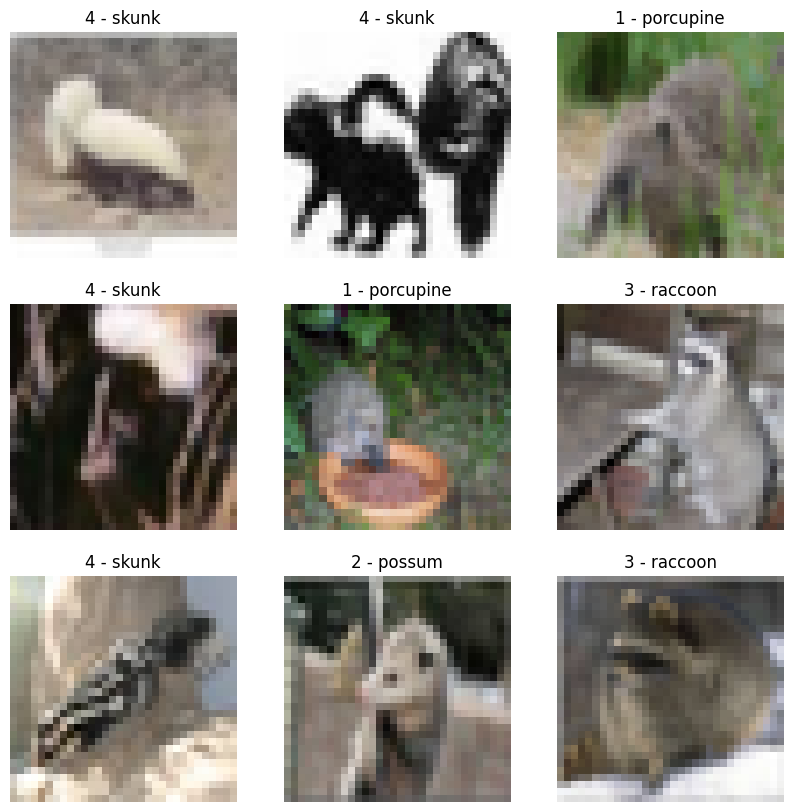

In [ ]:
#Playing around with this code - SAFE TO DELETE
a_tempList = a_testList
a_tempLabels = a_testLabels

plt.figure(figsize=(10, 10))
for i, data in enumerate(a_tempList):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(a_tempList[i])
  plt.title( str(str(a_tempLabels[i])+' - '+a_fineLabelVal[a_tempLabels[i]]) )
  plt.axis("off")
  if i == 8: break

In [ ]:
# CREATING THE MODEL
num_classes = 5

a_model = Sequential([
  layers.RandomFlip("horizontal", input_shape=(32,32,3)),
  layers.RandomRotation(0.1),
  layers.Rescaling(1./255),

  layers.Conv2D(32, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  # Flatten layer to transition from convolutional layers to fully connected layers
  layers.Flatten(),

  # Dense layers
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

a_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
a_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRot  (None, 32, 32, 3)         0         
 ation)                                                          
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0

In [ ]:
# Training and Testing the model
a_epochs=60
a_history = a_model.fit(
    a_trainList,
    a_trainLabels,
    epochs=   a_epochs,
    validation_split=0.1,
    callbacks=[callback]
)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 [==============================] - 9s 77ms/step - loss: 3.0723 - accuracy: 0.3804 - val_loss: 3.2039 - val_accuracy: 0.2040
Epoch 2/60
71/71 [==============================] - 5s 68ms/step - loss: 2.2156 - accuracy: 0.4871 - val_loss: 3.4796 - val_accuracy: 0.2040
Epoch 3/60
71/71 [==============================] - 6s 85ms/step - loss: 1.8533 - accuracy: 0.5413 - val_loss: 2.6025 - val_accuracy: 0.2400
Epoch 4/60
71/71 [==============================] - 5s 68ms/step - loss: 1.5860 - accuracy: 0.5964 - val_loss: 2.6010 - val_accuracy: 0.3040
Epoch 5/60
71/71 [==============================] - 6s 84ms/step - loss: 1.4309 - accuracy: 0.6191 - val_loss: 1.8309 - val_accuracy: 0.5040
Epoch 6/60
71/71 [==============================] - 5s 68ms/step - loss: 1.2771 - accuracy: 0.6591 - val_loss: 1.6862 - val_accuracy: 0.4920
Epoch 7/60
71/71 [==============================] - 5s 68ms/step - loss: 1.1643 - accuracy: 0.6827 - val_loss: 1.1458 - val_accuracy: 0.6840
Epoch 8/60
71/71 [======

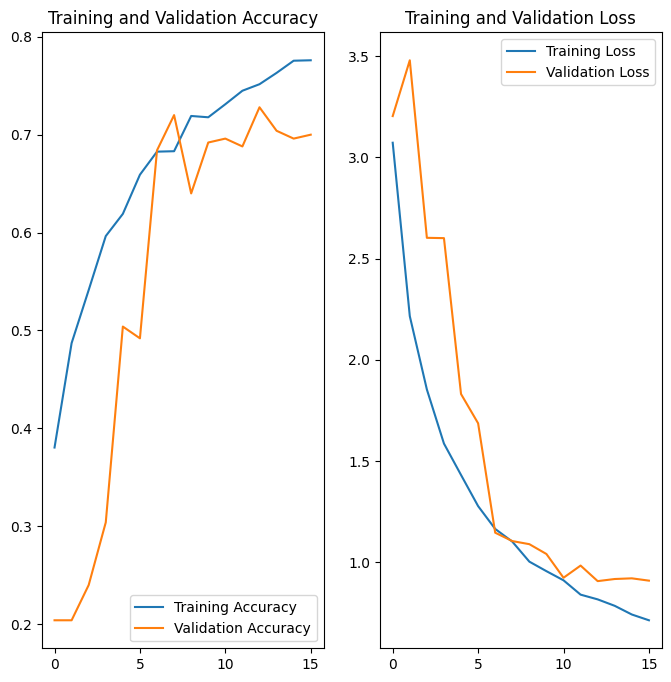

In [ ]:
# Presenting results of training
a_acc = a_history.history['accuracy']
a_val_acc = a_history.history['val_accuracy']

a_loss = a_history.history['loss']
a_val_loss = a_history.history['val_loss']

a_epochs_range = range(len(a_history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(a_epochs_range, a_acc, label='Training Accuracy')
plt.plot(a_epochs_range, a_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(a_epochs_range, a_loss, label='Training Loss')
plt.plot(a_epochs_range, a_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
a_pred = a_model.predict(a_testList, batch_size=64, verbose=1)
a_pred_bool = np.argmax(a_pred, axis=1)

print(classification_report(a_testLabels, a_pred_bool))

8/8 [==============================] - 0s 29ms/step
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       100
           1       0.94      0.50      0.65       100
           2       0.56      0.44      0.49       100
           3       0.51      0.78      0.62       100
           4       0.72      0.93      0.81       100

    accuracy                           0.68       500
   macro avg       0.72      0.68      0.67       500
weighted avg       0.72      0.68      0.67       500



SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE SPACE

In [ ]:
# CREATING THE MODEL
num_classes = 5

model = Sequential([
  layers.RandomFlip("horizontal", input_shape=(32,32,3)),
  layers.RandomRotation(0.1),
  layers.Rescaling(1./255),

  layers.Conv2D(32, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 2, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  # Flatten layer to transition from convolutional layers to fully connected layers
  layers.Flatten(),

  # Dense layers
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_11 (RandomFlip  (None, 32, 32, 3)         0         
 )                                                               
                                                                 
 random_rotation_11 (Random  (None, 32, 32, 3)         0         
 Rotation)                                                       
                                                                 
 rescaling_11 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_30 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                     

In [ ]:
epochs=60
history = model.fit(
    trainList,
    trainLabels,
    epochs=   epochs,
    validation_split=0.1,
    # callbacks=[callback]
)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


71/71 [==============================] - 11s 95ms/step - loss: 3.1978 - accuracy: 0.3582 - val_loss: 3.1985 - val_accuracy: 0.2360
Epoch 2/60
71/71 [==============================] - 4s 61ms/step - loss: 2.4439 - accuracy: 0.4053 - val_loss: 3.2505 - val_accuracy: 0.1920
Epoch 3/60
71/71 [==============================] - 5s 65ms/step - loss: 2.0942 - accuracy: 0.4284 - val_loss: 2.5678 - val_accuracy: 0.2560
Epoch 4/60
71/71 [==============================] - 5s 71ms/step - loss: 1.8924 - accuracy: 0.4333 - val_loss: 2.1144 - val_accuracy: 0.3200
Epoch 5/60
71/71 [==============================] - 4s 61ms/step - loss: 1.7054 - accuracy: 0.4658 - val_loss: 1.8006 - val_accuracy: 0.3760
Epoch 6/60
71/71 [==============================] - 5s 76ms/step - loss: 1.5836 - accuracy: 0.4738 - val_loss: 1.6507 - val_accuracy: 0.4400
Epoch 7/60
71/71 [==============================] - 4s 62ms/step - loss: 1.4982 - accuracy: 0.5000 - val_loss: 1.5365 - val_accuracy: 0.4480
Epoch 8/60
71/71 [=====

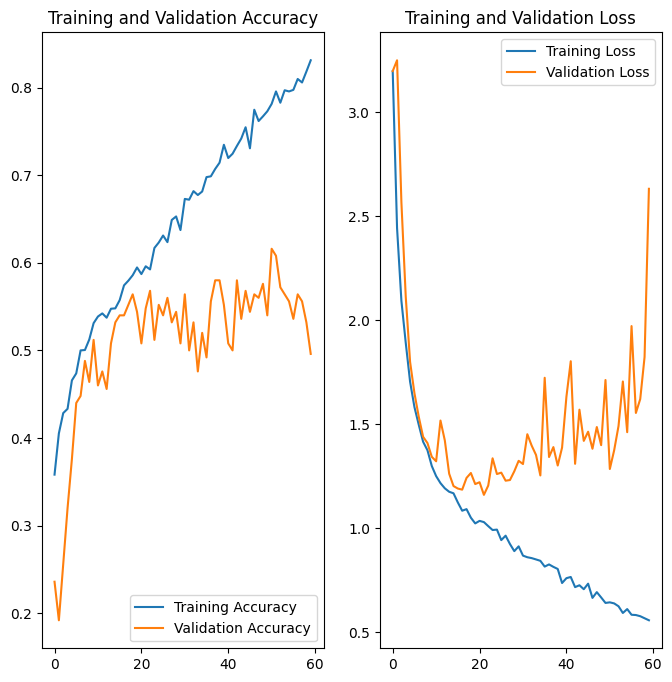

In [ ]:
# Presenting results of training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
pred = model.predict(testList, batch_size=64, verbose=1)
pred_bool = np.argmax(pred, axis=1)

print(classification_report(testLabels, pred_bool))

8/8 [==============================] - 0s 21ms/step
              precision    recall  f1-score   support

           0       0.62      0.52      0.57       100
           1       0.62      0.62      0.62       100
           2       0.37      0.29      0.32       100
           3       0.39      0.54      0.45       100
           4       0.62      0.61      0.62       100

    accuracy                           0.52       500
   macro avg       0.52      0.52      0.52       500
weighted avg       0.52      0.52      0.52       500

